In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
from scipy import optimize
from numpy import e
from numpy import cos
from numpy import sin
from numpy import diag
from numpy import sqrt
from numpy import pi

In [2]:
f_kHz = [ 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] 
A = [ 0.0803549, 0.0970207, 0.122119, 0.148907, 0.180654, 0.217523, 0.273322, 0.332731, 0.422594, 0.543424, 0.685976, 0.802721, 0.836879, 0.725552, 0.619835, 0.520782, 0.454945, 0.391218, 0.354478, 0.317376, 0.281619, 0.261364, 0.244131, 0.217523, 0.21365, 0.192701, 0.192701, 0.182209, 0.170904, 0.161064, 0.151389] 
sA = [ 0.00285374, 0.00311824, 0.00353265, 0.00401981, 0.00463207, 0.00538843, 0.00655321, 0.00784775, 0.00985274, 0.0125988, 0.0160013, 0.018751, 0.0196072, 0.0169147, 0.0143848, 0.0121107, 0.0105843, 0.00915188, 0.008321, 0.00751924, 0.00675527, 0.00631362, 0.00593531, 0.00538843, 0.00529137, 0.00488585, 0.00488585, 0.00467235, 0.00444928, 0.00426546, 0.00408737] 

In [7]:
def fitfunc(x,B,R,L,C):
    w0=1E-3/(sqrt(L*C)*2*pi)
    Q=sqrt(L/C)/R
    return B/sqrt(1+Q**2*(w0/x-x/w0)**2)

p_init = [1 ,28,0.001,99E-9] # valori iniziali 

p_best, pcov = optimize.curve_fit(
    fitfunc, f_kHz, A,          # assegno funzione di fit, ascisse e ordinate
    sigma=sA,                     # assegno gli errori sulle ordinate
    p0=p_init, bounds=(0, +np.inf) # imposto i valori iniziali dei parametri e
)      # intervalli ammessi [0, +∞)


---------------------------
Best fit values without errors
---------------------------
B = 0.8339724342578817  +-  0.011237918650671192
R = 29.871002610938433  +-  1.1086354239484537 Ohm
L = 0.0009535325986873542  +-  2.140540661736597e-05 H
C = 9.483189144640113e-08  +-  2.3231925071228362e-09 F
---------------------------


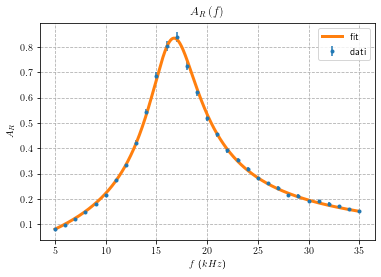

In [8]:
print("---------------------------")
print("Best fit values without errors")
print("---------------------------")
print("B =", p_best[0]," +- ",sqrt(diag(pcov)[0]))
print("R =", p_best[1]," +- ",sqrt(diag(pcov)[1]), "Ohm")
print("L =", p_best[2]," +- ",sqrt(diag(pcov)[2]), "H")
print("C =", p_best[3]," +- ",sqrt(diag(pcov)[3]),"F")
print("---------------------------")
fig=plt.figure()
plt.grid(linestyle='--')
plt.rc('text', usetex=True)
plt.errorbar(f_kHz, A, yerr=sA, fmt='.', label='dati')
_pts = np.linspace(f_kHz[0], f_kHz[-1],100000)
plt.plot(_pts, fitfunc(_pts, *p_best), label="fit",linewidth=3.0)
plt.title("$A_R \, (f)$")
plt.xlabel("$f$ ($ kHz$)")
plt.ylabel("$A_R$")
plt.legend();
#fig.savefig('fitnosigma_rlr.pdf')

In [9]:
res = []
chisqv=0
sigmasq=0
for i in range (0,len(A)):
    res.insert(i,A[i]-fitfunc(f_kHz[i], *p_best))
    sigmasq+=(res[i])**2
    chisqv+=(res[i]/sA[i])**2
sigma_A=np.full(len(A),sqrt(sigmasq/(len(A)-3)))
print("chisq=",chisqv)

chisq= 20.91922898576478


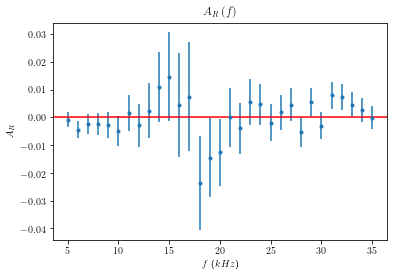

In [11]:
plt.figure(1)
plt.errorbar(f_kHz, res, yerr=sA, fmt='.')
plt.axhline(0, color='r')
plt.title("$A_R \, (f)$")
plt.xlabel("$f$ ($ kHz$)")
plt.ylabel("$A_R$")
plt.show()

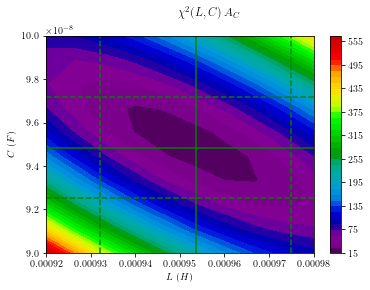

In [21]:
import matplotlib.pyplot as plt
def fitfuncplot(x,L,C):
    B=p_best[0]
    R=p_best[1]
    w0=1E-3/(sqrt(L*C)*2*pi)
    Q=sqrt(L/C)/R
    return B/sqrt(1+Q**2*(w0/x-x/w0)**2)
def chisquared(L,C):
    chisq=0
    for i in range (0,len(A)):
        chisq+=((A[i]-fitfuncplot(f_kHz[i],L,C))/sA[i])**2
    return chisq
fig=plt.figure()
y=np.linspace(90E-9,100E-9,10)
x=np.linspace(0.92E-3,0.98E-3,10)
#y=np.linspace(52,56,10)
z = np.array([chisquared(i,j) for j in y for i in x])
X, Y = np.meshgrid(x, y)
Z = z.reshape(10, 10)
plt.contourf(X, Y, Z,50,vmin=0,vmax=600,cmap='nipy_spectral')
fig.suptitle(' $\chi ^2 (L,C) \, A_C$ ')
plt.xlabel('$L$ $(H)$')
#plt.ylabel('$R$ ($\Omega$)')
plt.ylabel('$C$ $(F)$')
plt.colorbar()
plt.axvline(p_best[2], color='g')
plt.axhline(p_best[3], color='g')
plt.axvline(p_best[2]+sqrt(diag(pcov)[2]),color='g',linestyle='--')
plt.axvline(p_best[2]-sqrt(diag(pcov)[2]),color='g',linestyle='--')
plt.axhline(p_best[3]+sqrt(diag(pcov)[3]),color='g',linestyle='--')
plt.axhline(p_best[3]-sqrt(diag(pcov)[3]),color='g',linestyle='--')
#fig.savefig('chisqLCrlr.pdf')